NADILLIA SAHPUTRA
2070770

In [1]:
library(ggplot2)
library(ggpubr)

 1. Study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial.
Assume the following priors:
- a uniform distribution
- a Jeffrey’s prior
- a step function: 

$g(\pi)= \begin{cases}\pi & \pi \leq 0.2 \\ 0.2 & 0.2<\pi \leq 0.3 \\ 0.5-\pi & 0.3<\pi \leq 0.5 \\ 0 & 0.5<\pi\end{cases}$


- plot the posterior distribution and summarize the results computing the first two moments

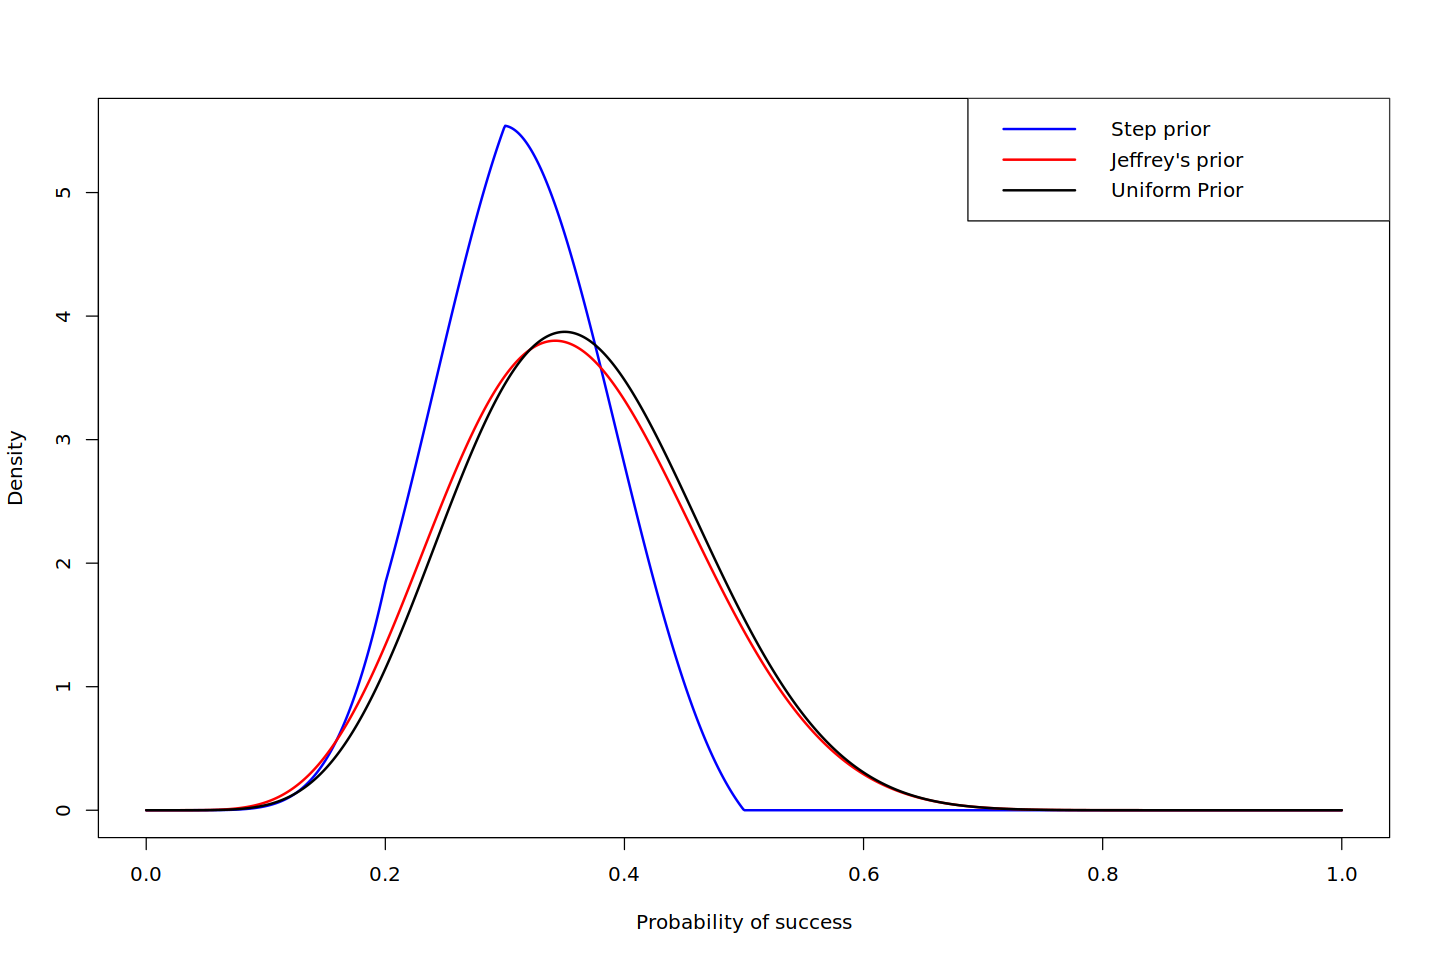

In [4]:
# Define data
y <- 7
n <- 20

#sequences
p <- seq(0, 1, length.out = 1000)

#likelihood
likelihood <- function(p) dbinom(y, n, p)

#prior
prior_jeffrey <- function(p) dbeta(p, 1/2, 1/2)
prior_step <- function(p) {
  ifelse(p <= 0.2, p, 
         ifelse(p <= 0.3, 0.2, 
                ifelse(p <= 0.5, 0.5 - p, 0)))
}
prior_unif <- function(p) dunif(p,0,1)

#posterior
posterior_jeffrey <- function(p) dbeta(p, 1/2 + y, 1/2 + n - y)
nc_jeff <- integrate(posterior_jeffrey, 0, 1)$value
jeffrey_norm <- function(p) posterior_jeffrey(p)/nc_jeff

posterior_step <- function(p) (prior_step(p) * likelihood(p))
nc_step <- integrate(posterior_step, 0, 1)$value   
step_norm <- function(p) posterior_step(p)/nc_step

post_unif <- function(p) likelihood(p)*prior_unif(p)
nc_unif <- integrate(post_unif, 0, 1)$value
unif_norm <- function(p) post_unif(p)/nc_unif


# Plot posterior distribution
options(repr.plot.width=12, repr.plot.height=8) 
plot(p, step_norm(p), type = "l", col = "blue", lwd = 2, xlab = "Probability of success",
     ylab = "Density")
lines(p, jeffrey_norm(p), lwd=2, col = "red")
lines(p, unif_norm(p), lwd=2, col = "black")
legend("topright", legend = c("Step prior", "Jeffrey's prior", "Uniform Prior"), 
                  col = c("blue", "red", "black"),lwd=2,cex=1)



In [5]:
credibility_bound <- function(x, posterior_function) {
         lower_bound <- round(uniroot(function(x)integrate(posterior_function,0,x)$value-0.025,c(0,5))$root,2)
         upper_bound <- round(uniroot(function(x)integrate(posterior_function,0,x)$value-0.975,c(0,5))$root,2) 
         newarea <- round(integrate(posterior_function,lower_bound,upper_bound)$value,2)                             
         return(c(LB = lower_bound, UB = upper_bound, Area = newarea))}

[1] 0.1810694

[1] 0.5696854

mean unif: 0.3636364
var : 0.01006109

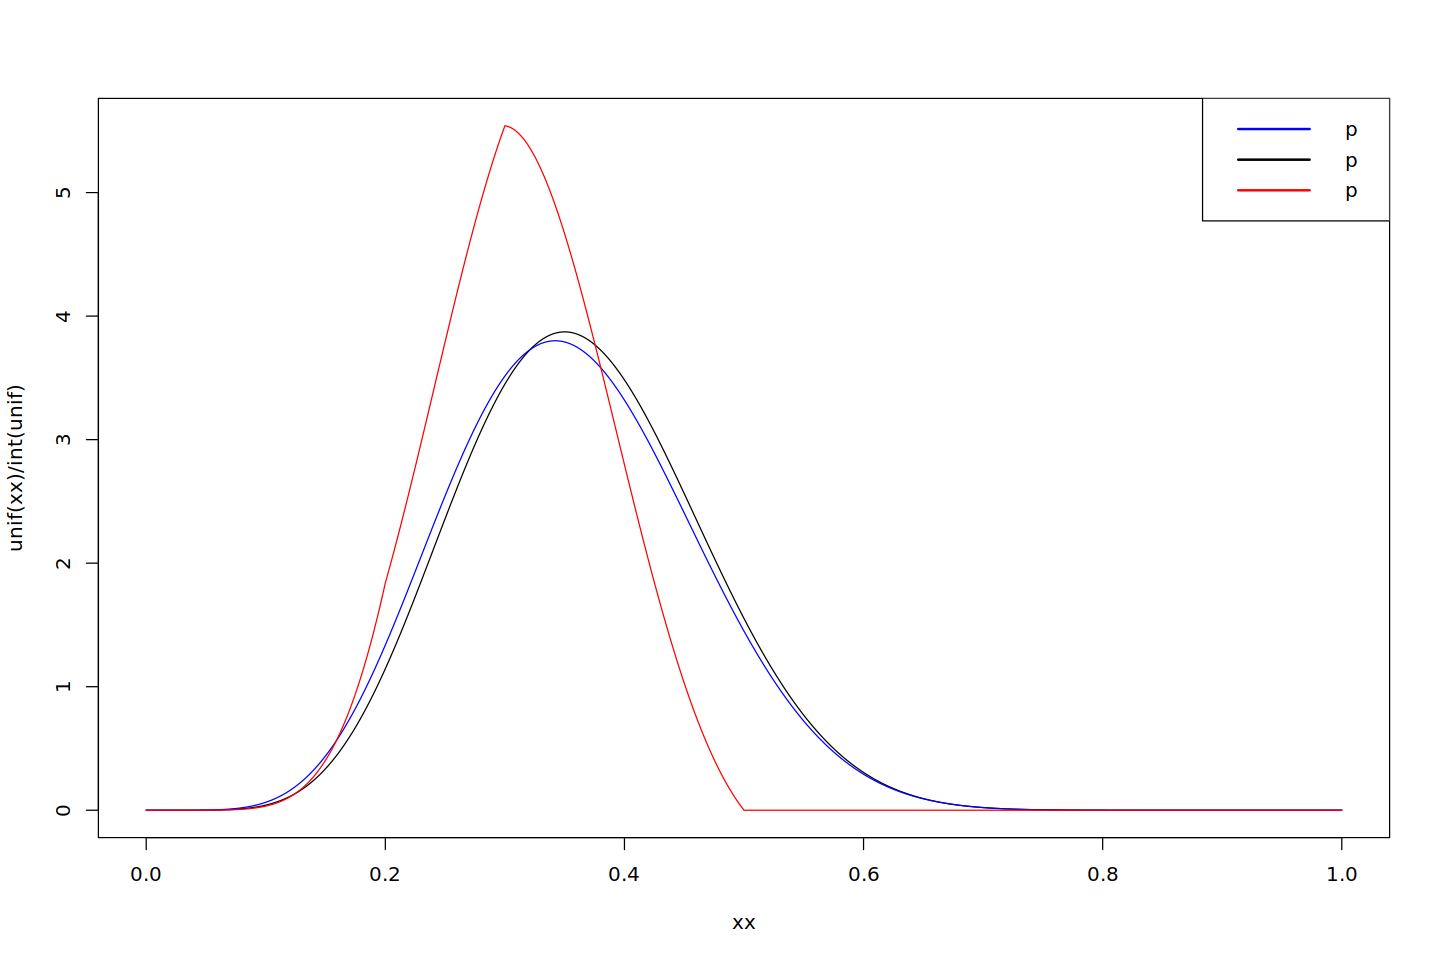

In [6]:
xx <- seq(0,1,0.001)
unif <- function(x) dbeta(x,8,14)
jeff <- function(x) dbeta(x,7.5,13.5)
int <- function(s) {integral <- integrate(s,0,1)$value
                    return (integral)}
step <- function(x){
    ifelse (x<=0.2,x,
    ifelse (x<=0.3, 0.2, 
    ifelse(x<=0.5,0.5-x, 0)))    
}

posterior <- function(xx) dbinom(7,20,xx)*step(xx)
post <- function(xx) unif(xx)/int(unif)
uniroot(function(xx) integrate(post, 0 ,xx)$value-0.025, c(0,1))$root
uniroot(function(xx) integrate(post,0,xx)$value-0.975, c(0,1))$root
                


options(repr.plot.width=12, repr.plot.height=8)
plot(xx, unif(xx)/int(unif), type='l', ylim =c(0,max(posterior(xx)/int(posterior))))
lines(xx, (jeff(xx)/int(jeff)), col='blue')
lines(xx, (posterior(xx)/int(posterior)), col='red')
legend('topright', legend=c('p','p','p'), col=c('blue','black','red'), lwd = 2, cex=1)

mean <- int(function(xx) xx*unif(xx))

cat('mean unif:', int(function(xx) xx*unif(xx)))
cat('\n')
cat('var :',int(function(xx) (xx-mean)^2*unif(xx)))


In [7]:
# Compute mean and variance
mean_unif <- integrate(function(p) p * unif_norm(p), lower = 0, upper = 1)$value
var_unif <- integrate(function(p) (p-mean_unif)^2 *unif_norm(p), lower = 0, upper = 1)$value

mean_jeff <- integrate(function(p) p * jeffrey_norm(p), lower = 0, upper = 1)$value
var_jeff <- integrate(function(p) (p-mean_jeff)^2 *jeffrey_norm(p), lower = 0, upper = 1)$value
                      
mean_step <- integrate(function(p) p * step_norm(p), lower = 0, upper = 1)$value
var_step <- integrate(function(p) (p-mean_step)^2 *step_norm(p), lower = 0, upper = 1)$value

# Print mean and variance
cat("Mean of the posterior with uniform prior:", mean_unif, "\n")
cat("and the variance is:", var_unif, "\n")
cat("\n")                     
cat("Mean of the posterior with Jeffrey's prior:", mean_jeff, "\n")
cat("and the variance is:", var_jeff, "\n")
cat("\n")                     
cat("Mean of the posterior with step prior:", mean_step, "\n")
cat("and the variance is:", var_step, "\n")

Mean of the posterior with uniform prior: 0.3636364 
and the variance is: 0.01006109 

Mean of the posterior with Jeffrey's prior: 0.3571429 
and the variance is: 0.01043599 

Mean of the posterior with step prior: 0.3120634 
and the variance is: 0.00499872 


- compute a 95% credibility interval and give the results in a summary table

In [8]:
lower_unif = p[which(cumsum(unif_norm(p)*p)/cumsum(unif_norm(p)*p)[1000]>=0.025)[1]]
upper_unif = p[which(cumsum(unif_norm(p)*p)/cumsum(unif_norm(p)*p)[1000]>=0.975)[1]]

lower_jeffrey = p[which(cumsum(jeffrey_norm(p)*p)/cumsum(jeffrey_norm(p)*p)[1000]>=0.025)[1]]
upper_jeffrey = p[which(cumsum(jeffrey_norm(p)*p)/cumsum(jeffrey_norm(p)*p)[1000]>=0.975)[1]]

lower_step = p[which(cumsum(step_norm(p)*p)/cumsum(step_norm(p)*p)[1000]>=0.025)[1]]
upper_step = p[which(cumsum(step_norm(p)*p)/cumsum(step_norm(p)*p)[1000]>=0.975)[1]]

In [9]:
#dataframe
df_limit <- data.frame(prior = c("Uniform", "Jeffrey's", "Step"), 
                       lower_limit = c(lower_unif,lower_jeffrey, lower_step),
                       upper_limit = c(upper_unif, upper_jeffrey, upper_step))

(df_limit)


prior,lower_limit,upper_limit
<chr>,<dbl>,<dbl>
Uniform,0.2072072,0.5935936
Jeffrey's,0.1991992,0.5925926
Step,0.1931932,0.4564565


- draw the limits on the plot of the posterior distribution

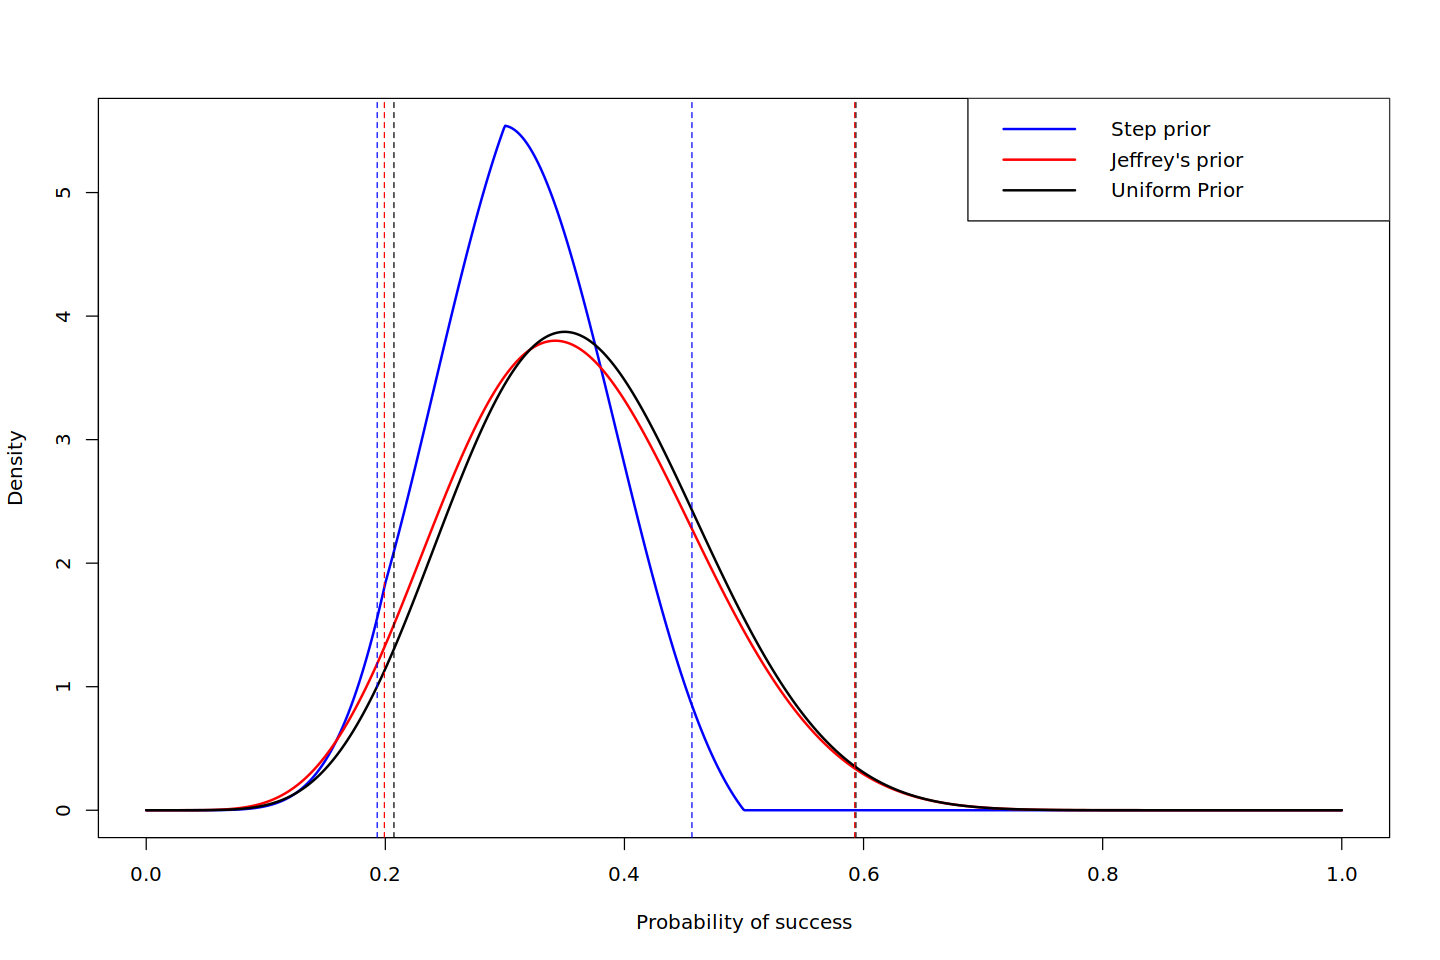

In [10]:
# Plot posterior distribution
options(repr.plot.width=12, repr.plot.height=8) 
plot(p, step_norm(p), type = "l", col = "blue", lwd = 2, xlab = "Probability of success",
     ylab = "Density")
lines(p, jeffrey_norm(p), lwd=2, col = "red")
lines(p, unif_norm(p), lwd=2, col = "black")
abline(v=lower_unif,col = "black", lty=2)
abline(v=upper_unif,col = "black", lty=2)
abline(v=lower_jeffrey,col = "red",lty=2)
abline(v=upper_jeffrey,col = "red",lty=2)
abline(v=lower_step,col = "blue",lty=2)
abline(v=upper_step,col = "blue",lty=2)
legend("topright", legend = c("Step prior", "Jeffrey's prior", "Uniform Prior"), 
                  col = c("blue", "red", "black"),lwd=2,cex=1)


2. Giardia cysts[1] is a parassite that can contaminate food, water, and surfaces, and they can cause
giardiasis when swallowed in this infective stage of their life cycle. Infection occurs when a person
swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects.
A group of researchers, working for a Human Health Department, work for determining the quality
of stream water.They take n = 116 samples of one-liter water from sites identified to have a heavy environmental
impact from birds and waterflow.Out of these samples, y = 17 samples contained Giard cystis.
Assuming π as the probability that one-liter water sample contains Giardia cystis, find the posterior
distribution for π
- assuming a uniform prior distribution
- assuming a Beta (1, 4) prior

- plot the posterior distribution and summerize the results computing the first two moments
- find a normal approximation for the posterior g(π|y)
- compute a 95% credibility interval both for the original posterior and for the normal approximation, giving the results in a summary table
- add the limits on the plot of the posterior distributions

prior,lower_limit,upper_limit
<chr>,<dbl>,<dbl>
Uniform,0.10010010,0.2302302
"Beta(1,4)",0.09709710,0.2252252
Approximation Normal,0.09409409,0.2172172


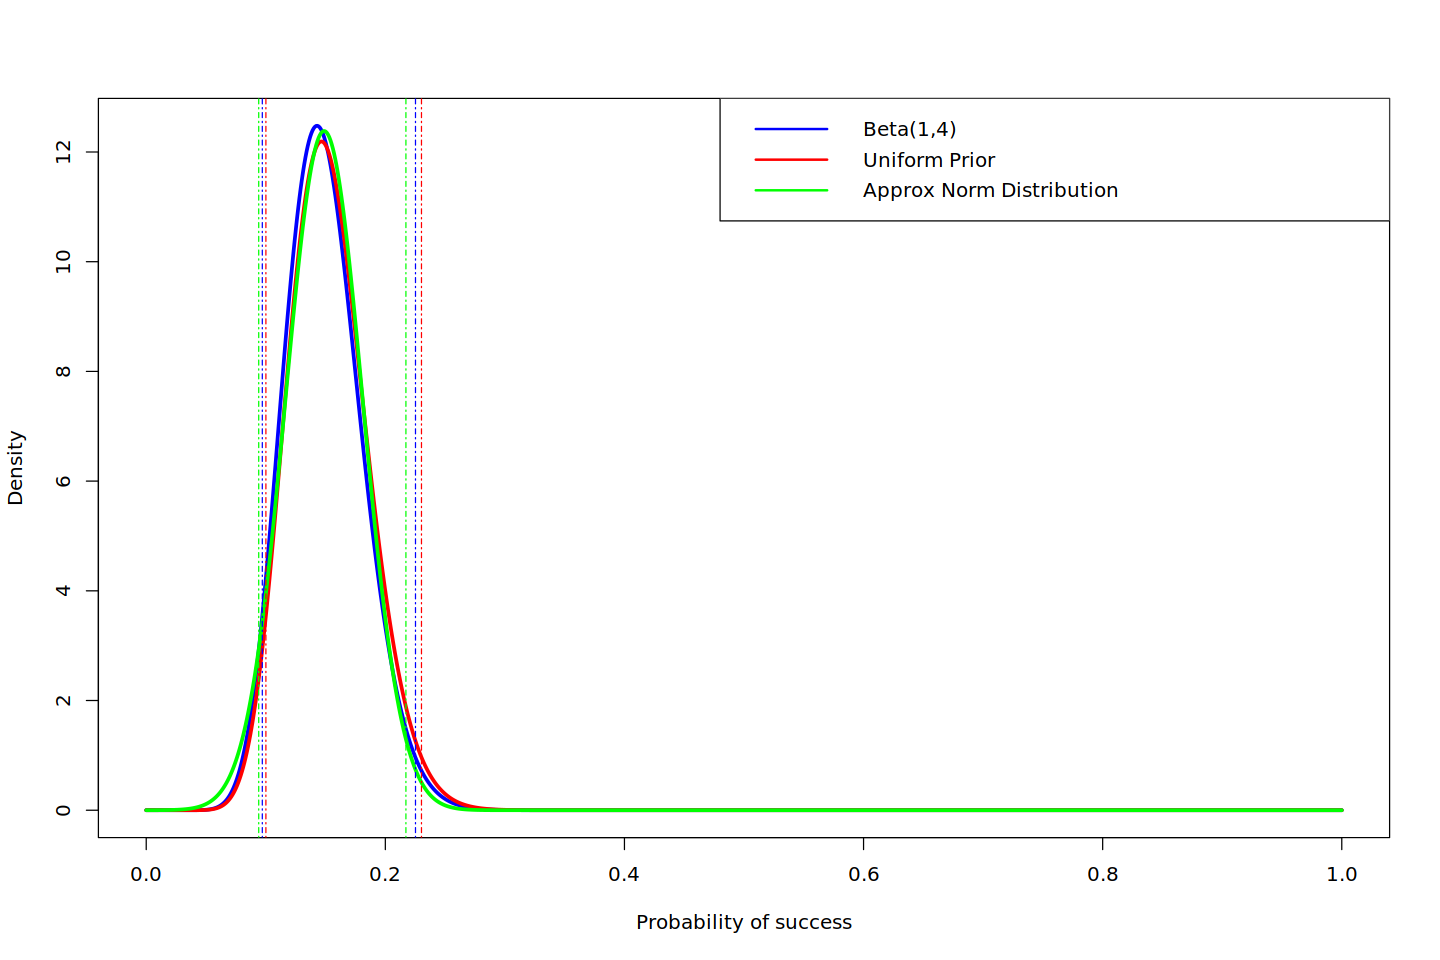

In [11]:
# Define data
y <- 17
n <- 116

#sequences
p <- seq(0, 1, length.out = 1000)

#likelihood
likelihood <- function(p) dbinom(y, n, p)

#prior
prior_beta <- function(p) dbeta(p, 1, 4)
prior_unif <- function(p) dbeta(p, 1, 1)

#posterior
a <- 1+y
b <- 4+n-y
posterior_beta <- function(p) dbeta(p,a,b)
nc_beta <- integrate(posterior_beta, 0, 1)$value
beta_norm <- function(p) posterior_beta(p)/nc_beta

post_unif <- function(p) likelihood(p)*prior_unif(p)
nc_unif <- integrate(post_unif, 0, 1)$value
unif_norm <- function(p) post_unif(p)/nc_unif

#normal approximation using the mean and std from posterior of beta prior
post_mean_beta <- a/(a+b)
post_var_beta <- sqrt((a*b)/((a+b)^2*(a+b+1)))
approx <- function(p) dnorm(p,post_mean_beta,post_var_beta)
nc_norm <- integrate(approx, 0, 1)$value
approx_norm <- function(p) approx(p)/nc_norm


#credibility interval 
lower_unif = p[which(cumsum(unif_norm(p)*p)/cumsum(unif_norm(p)*p)[1000]>=0.025)[1]]
upper_unif = p[which(cumsum(unif_norm(p)*p)/cumsum(unif_norm(p)*p)[1000]>=0.975)[1]]

lower_beta = p[which(cumsum(beta_norm(p)*p)/cumsum(beta_norm(p)*p)[1000]>=0.025)[1]]
upper_beta = p[which(cumsum(beta_norm(p)*p)/cumsum(beta_norm(p)*p)[1000]>=0.975)[1]]

lower_norm = p[which(cumsum(approx_norm(p)*p)/cumsum(approx_norm(p)*p)[1000]>=0.025)[1]]
upper_norm = p[which(cumsum(approx_norm(p)*p)/cumsum(approx_norm(p)*p)[1000]>=0.975)[1]]

#dataframe
df_limit <- data.frame(prior = c("Uniform", "Beta(1,4)", "Approximation Normal"), 
                       lower_limit = c(lower_unif,lower_beta, lower_norm),
                       upper_limit = c(upper_unif, upper_beta, upper_norm))

(df_limit)


# Plot posterior distribution
plot(p, beta_norm(p), type = "l", col = "blue", lwd = 3, xlab = "Probability of success",
     ylab = "Density")
lines(p, unif_norm(p), lwd=3, col = "red")
lines(p, approx_norm(p), lwd=3, col = "green")
abline(v=lower_unif,col = "red", lty=10)
abline(v=upper_unif,col = "red", lty=10)
abline(v=lower_beta,col = "blue",lty=10)
abline(v=upper_beta,col = "blue",lty=10)
abline(v=lower_norm,col = "green",lty=10)
abline(v=upper_norm,col = "green",lty=10)
legend("topright", legend = c("Beta(1,4)", "Uniform Prior", "Approx Norm Distribution"), 
                  col = c("blue", "red", "green"),lwd=2,cex=1)

3. A coin is flipped n = 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,
H, H

-  Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.


In [12]:
# data 
trial <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", 
           "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")
ntrial <- length(trial)
n.T<- sum(trial=="T")

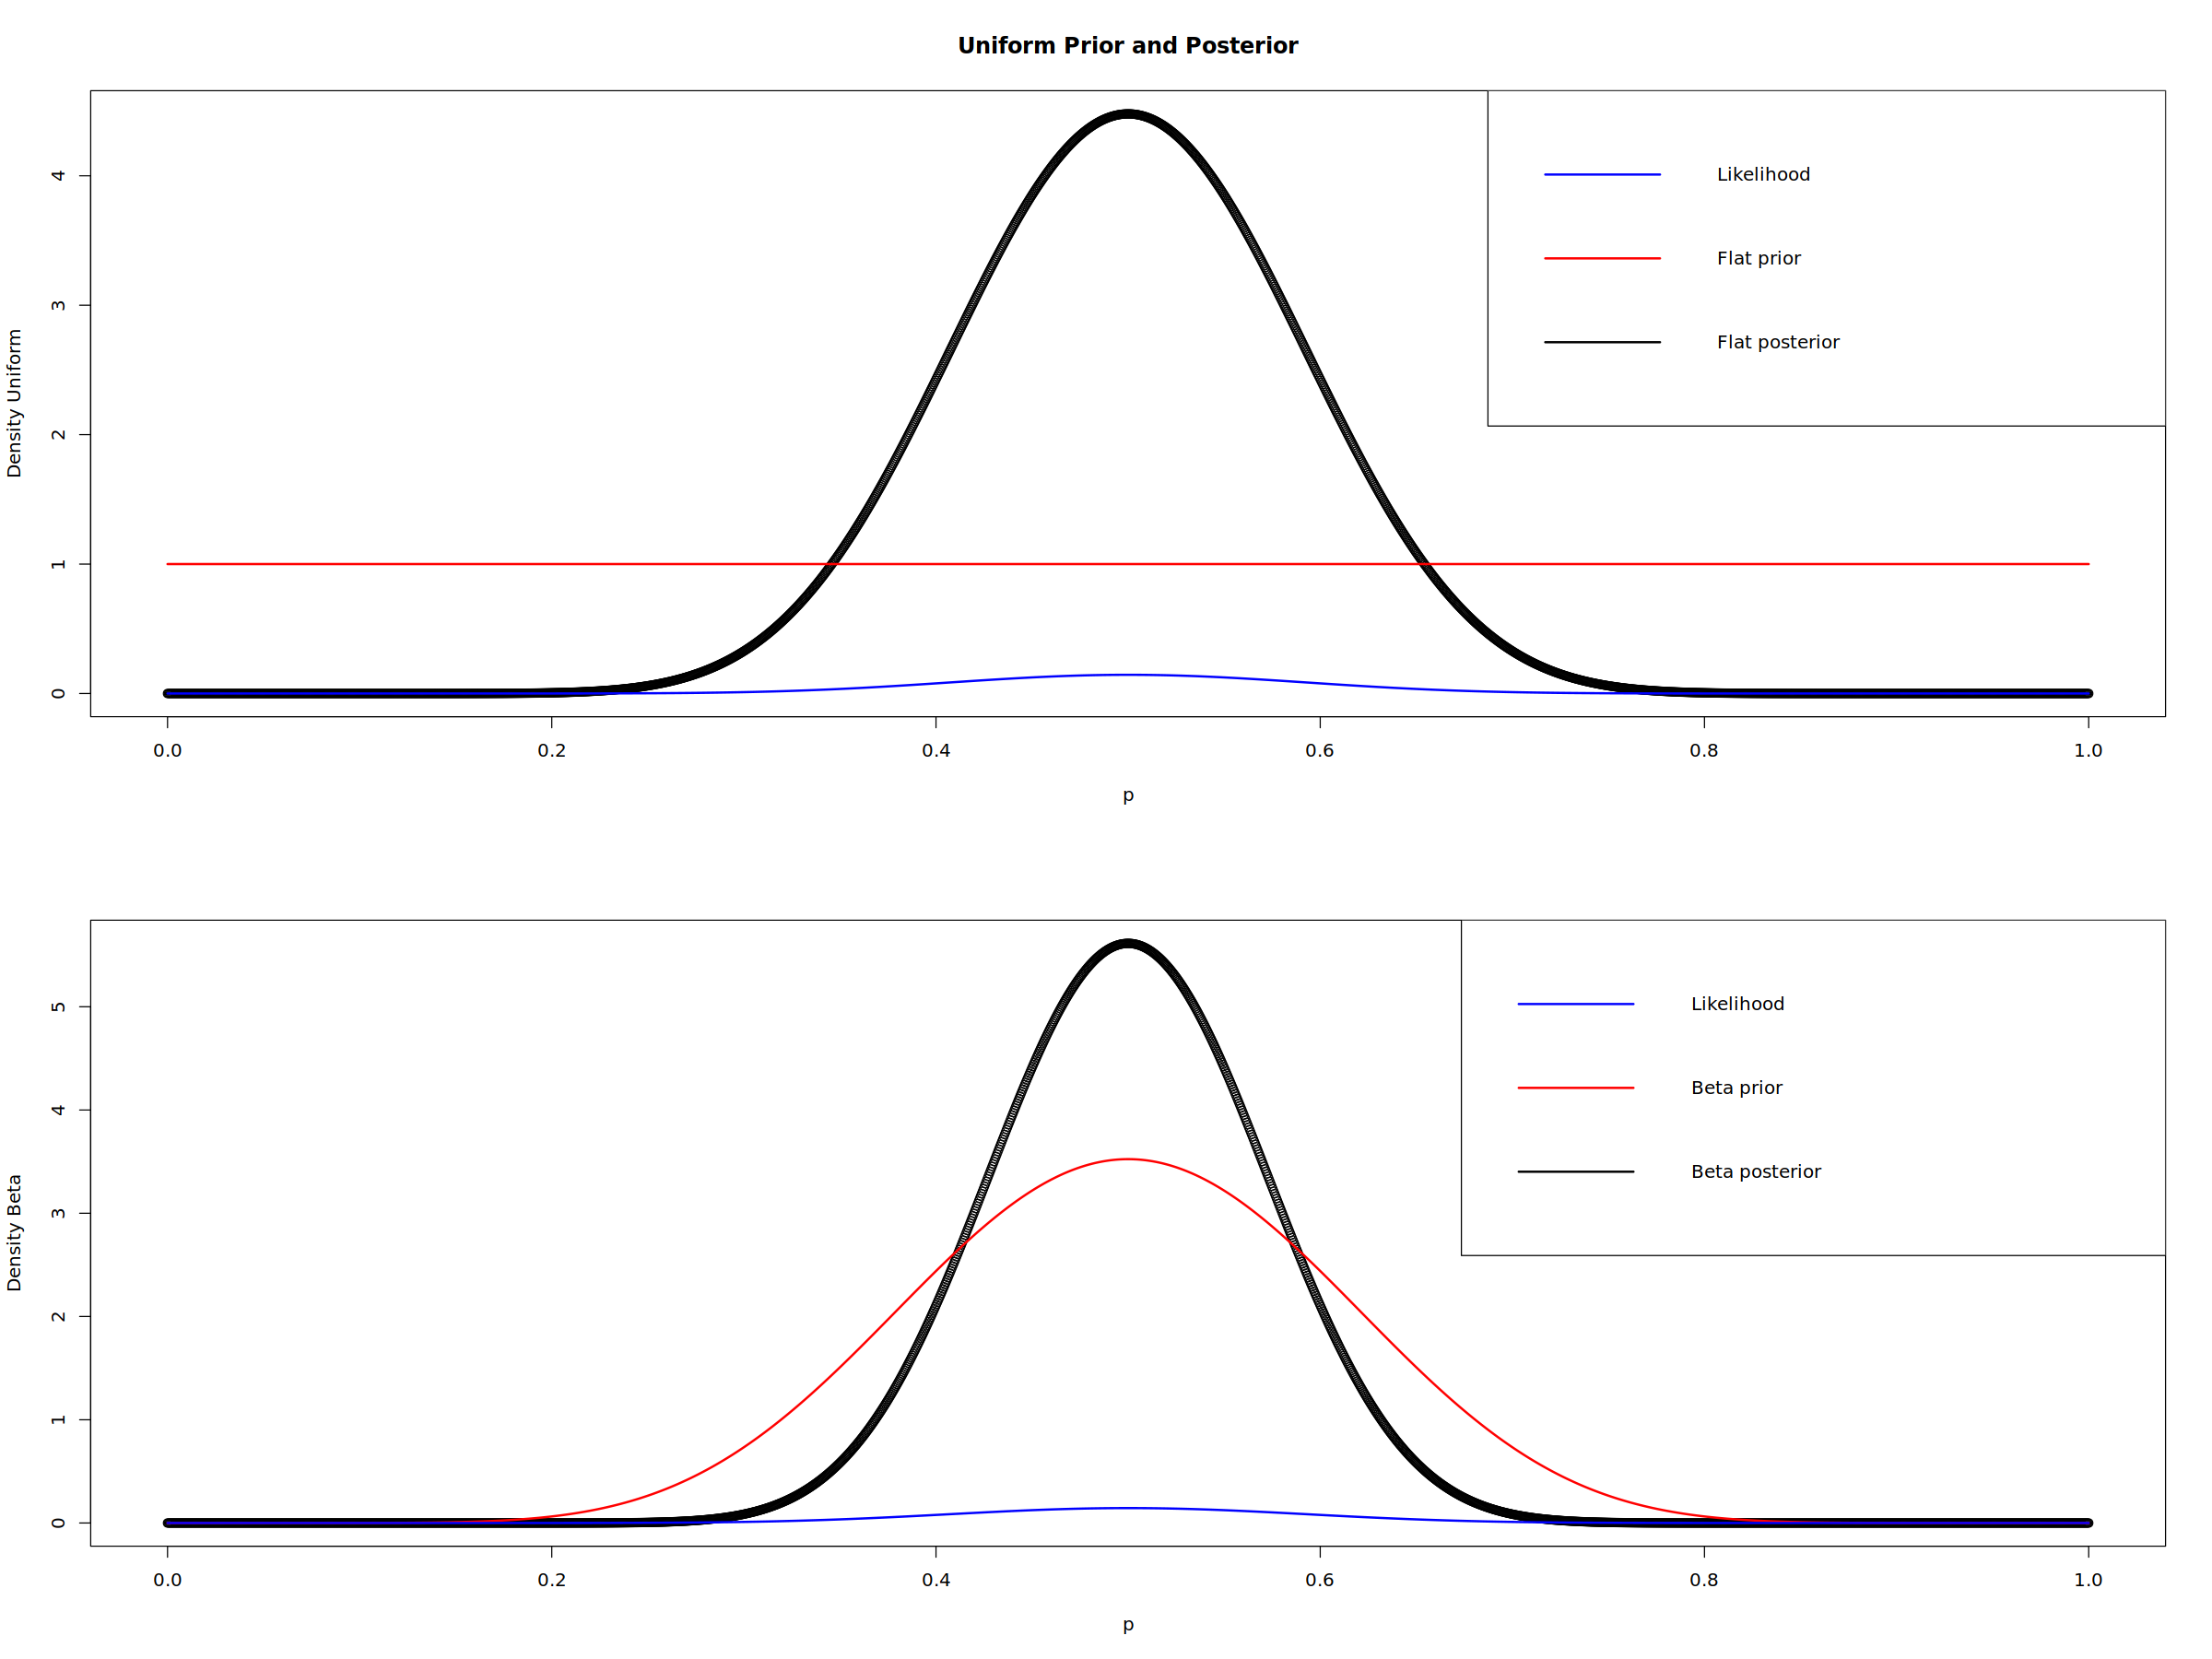

In [13]:
len <- 2000
p <- seq(0,1, length.out=len)
# likelihood 
likelihood <- function(p) dbinom(n.T, ntrial, p)

# uniform prior
unif <- function(p) dunif(p,0,1)
post.unif <- function(p) likelihood(p)*unif(p)
normalization_constant_unif <- integrate(post.unif, 0, 1)$value
post.unif.norm  <- function(p) post.unif(p)/normalization_constant_unif

# beta prior 
beta <- function(p) dbeta(p,10,10)
post.beta <- function(p) likelihood(p)*beta(p)
normalization_constant <- integrate(post.beta, 0, 1)$value
post.beta.norm  <- function(p) post.beta(p)/ normalization_constant

# plotting settings
par(mfrow=c(2,1))
options(repr.plot.width=20, repr.plot.height=15)

# plotting uniform prior, likelihood, posterior
plot(p, post.unif.norm(p) , col = 'black', ylab = "Density Uniform", main='Uniform Prior and Posterior')
lines(p, unif(p), type="l", lwd=2, col='red')
lines(p, likelihood(p), type="l", lwd=2, col='blue')
legend("topright", legend = c("Likelihood", "Flat prior", "Flat posterior"), 
                  col = c("blue", "red", "black"),lwd=2,cex=1)
                                                   
# plotting beta prior, likelihood, posterior
plot(p, post.beta.norm(p) , col = 'black', ylab = "Density Beta")
lines(p, beta(p), type="l", lwd=2, col='red')
lines(p, likelihood(p), type="l", lwd=2, col='blue')
legend("topright", legend = c("Likelihood", "Beta prior", "Beta posterior"), 
                  col = c("blue", "red", "black"),lwd=2,cex=1)

- Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval

In [14]:
# most probable value
unif_mode <- which.max(post.unif.norm(p))/len
beta_mode <- which.max(post.beta.norm(p))/len

cat("Flat prior mode:", unif_mode, "\n")
cat("Beta prior mode:", beta_mode,"\n")


# credibility estimation
lower_unif <- p[which(cumsum(post.unif.norm(p)*p)/cumsum(post.unif.norm(p)*p)[len]>=0.025)[1]]
upper_unif <- p[which(cumsum(post.unif.norm(p)*p)/cumsum(post.unif.norm(p)*p)[len]>=0.975)[1]]
cat("The 95% credibility interval for uniform is:", round(lower_unif, 3), "-", round(upper_unif, 3),"\n")

# credibility estimation
lower_beta <- p[which(cumsum(post.beta.norm(p)*p)/cumsum(post.beta.norm(p)*p)[len]>=0.025)[1]]
upper_beta <- p[which(cumsum(post.beta.norm(p)*p)/cumsum(post.beta.norm(p)*p)[len]>=0.975)[1]]
cat("The 95% credibility interval for beta is:", round(lower_beta, 3), "-", round(upper_beta, 3),"\n")


Flat prior mode: 0.5 
Beta prior mode: 0.5 
The 95% credibility interval for uniform is: 0.348 - 0.681 
The 95% credibility interval for beta is: 0.374 - 0.645 


- Repeat the same analysis assuming a sequential analysis of the data 1
. Show how the most probable
value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to
30).

In [15]:
# data 
trial <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", 
           "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")
len <- 2000
p <- seq(0,1, length.out=len)

In [16]:
# beta prior 
beta <- dbeta(p,10,10)
max <- c(1:30)
p_up <- c(1:30)
p_down <- c(1:30)
for (tr in 1:30){
    n.T <- sum(trial[1:tr]=="T")
    likelihood <- dbinom(n.T, tr, p)
    post <- likelihood*beta
    post_beta_norm <- post/sum(post)*len
    p_down[tr] <- p[which(cumsum(post_beta_norm*p)/cumsum(post_beta_norm*p)[len]>=0.025)[1]]
    p_up[tr] <- p[which(cumsum(post_beta_norm*p)/cumsum(post_beta_norm*p)[len]>=0.975)[1]]
    max[tr] <- p[which.max(post_beta_norm)]
    beta <- post_beta_norm
}

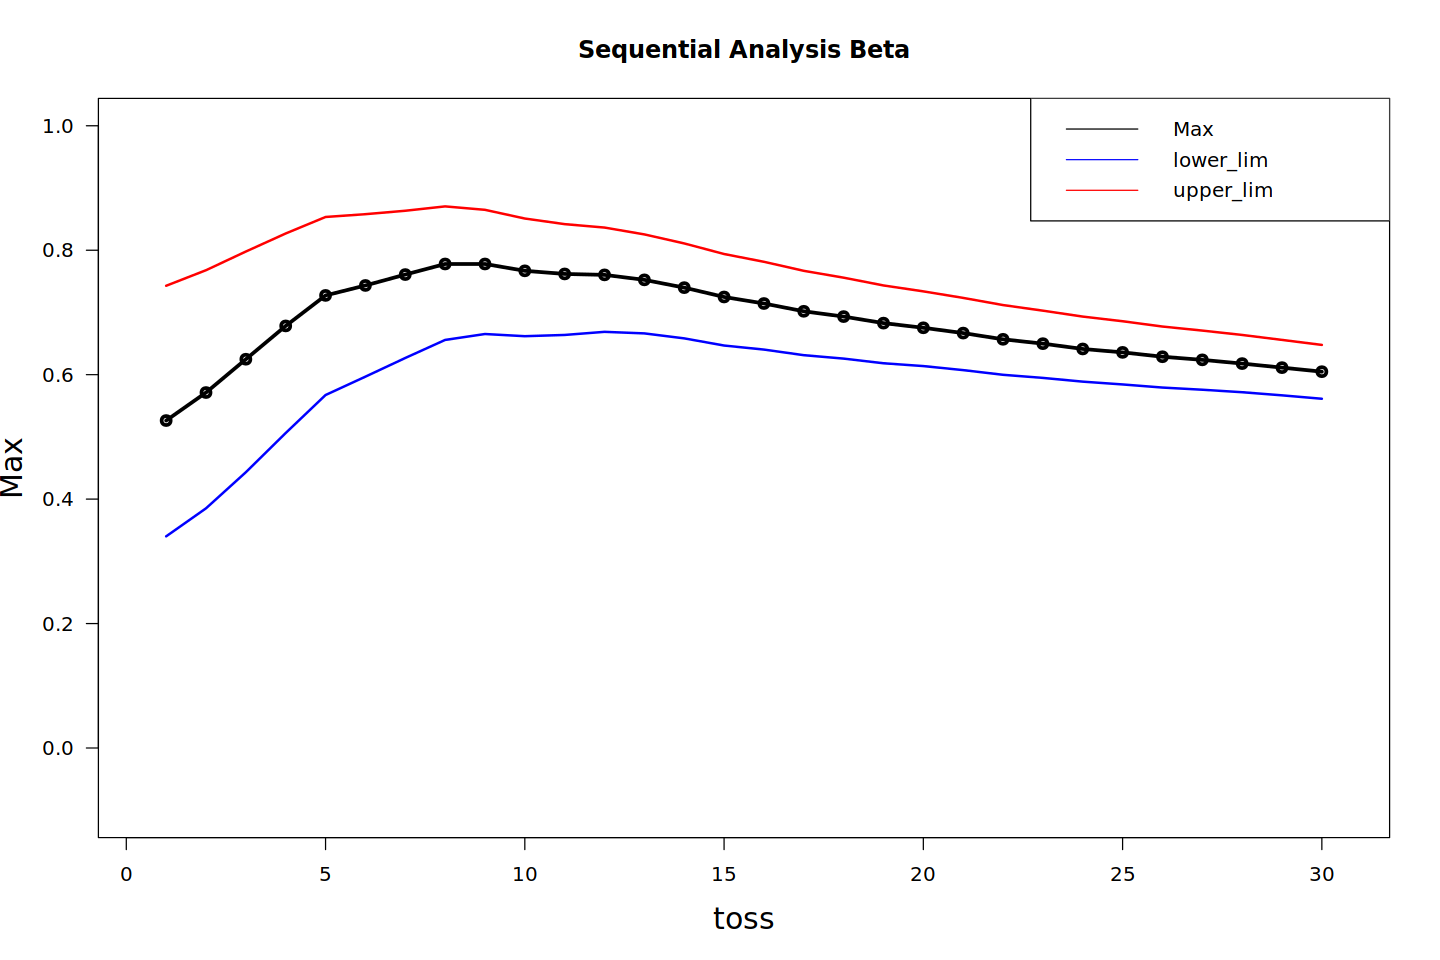

In [17]:
# plotting
options(repr.plot.width=12, repr.plot.height=8)              
plot(1:30, max, type='o', lwd = 3, 
     col = 'black', main="Sequential Analysis Beta", 
      xlim=c(0.5,30.5), ylim=c(-0.1,1),
     xlab="toss", ylab="Max", cex.lab=1.5, las=1)
lines((1:30), p_down, lwd = 2, col='blue')
lines((1:30), p_up, lwd = 2, col='red')
legend("topright", legend=c("Max","lower_lim","upper_lim"),
        col=c("black","blue","red"), lty = c(1,1,1))

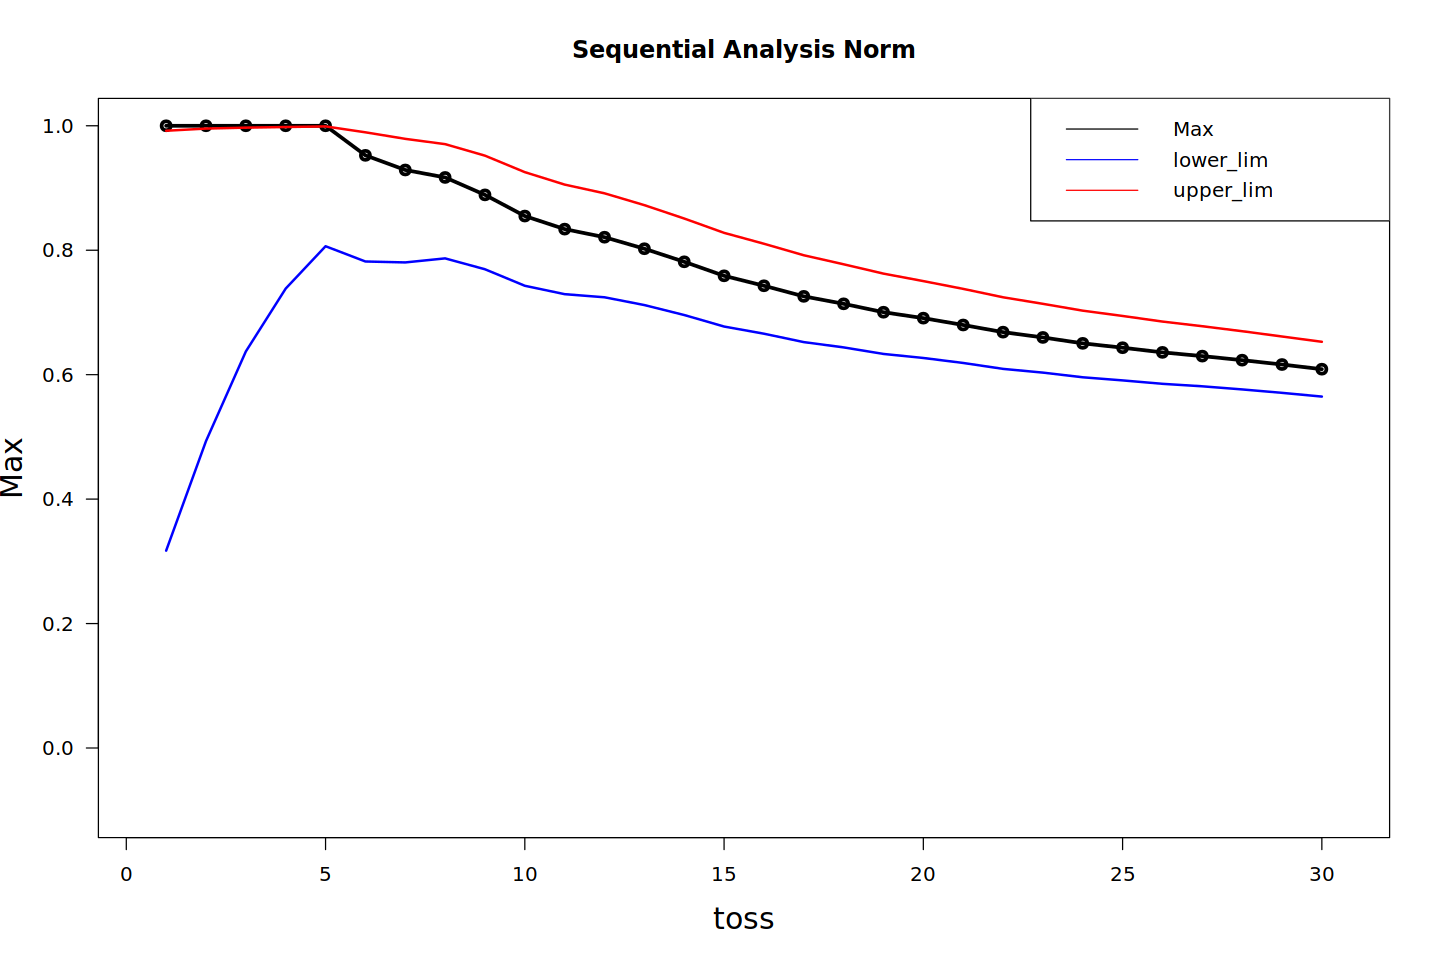

In [18]:
# norm prior 
norm <- dnorm(p,1,1)
max <- c(1:30)
p_up <- c(1:30)
p_down <- c(1:30)
for (tr in 1:30){
    n.T <- sum(trial[1:tr]=="T")
    likelihood <- dbinom(n.T, tr, p)
    post <- likelihood*norm
    post_norm_norm <- post/sum(post)*len
    p_down[tr] <- p[which(cumsum(post_norm_norm*p)/cumsum(post_norm_norm*p)[len]>=0.025)[1]]
    p_up[tr] <- p[which(cumsum(post_norm_norm*p)/cumsum(post_norm_norm*p)[len]>=0.975)[1]]
    max[tr] <- p[which.max(post_norm_norm)]
    norm <- post_norm_norm
}

# plotting
options(repr.plot.width=12, repr.plot.height=8)             
plot(1:30, max, type='o', lwd = 3, 
     col = 'black', main="Sequential Analysis Norm", 
      xlim=c(0.5,30.5), ylim=c(-0.1,1),
     xlab="toss", ylab="Max", cex.lab=1.5, las=1)
lines((1:30), p_down, lwd = 2, col='blue')
lines((1:30), p_up, lwd = 2, col='red')
legend("topright", legend=c("Max","lower_lim","upper_lim"),
        col=c("black","blue","red"), lty = c(1,1,1))

4. Write a program in R that performs a simulation of the process
- after selecting a random box
- make random sampling from the box
- prins on the standard output the probability of selecting each box
- plot the probability for each box as a function of the number of trial


In [27]:
set.seed(89540)

#random box
k <- sample(0:5,1)
N <- 60 #num trials
extractions <- 0

#make a dataaframe for possibilities with 1/6 as an initial probability
pr_H0 <- c(1/6, rep(0, N)) 
pr_H1 <- c(1/6, rep(0, N)) 
pr_H2 <- c(1/6, rep(0, N)) 
pr_H3 <- c(1/6, rep(0, N)) 
pr_H4 <- c(1/6, rep(0, N)) 
pr_H5 <- c(1/6, rep(0, N)) 
prob_df <- data.frame(pr_H0, pr_H1, pr_H2, pr_H3, pr_H4, pr_H5)


prob<- function(extractions){      
    N <- length(extractions)
    for (i in 1:N){             
        for(k in 0:5){
            pb <- k/5     #prob of getting black
            pw <- (5-k)/5 #prob of getting white
            prob_df[i+1, k+1] <- ifelse(extractions[i] == 1, prob_df[i, k+1]*pb, # extract black
                                     prob_df[i, k+1]*pw) # extract white
            #normalization factor
            norm <- sum(prob_df[i, ])
            prob_df[i+1, k+1] <- prob_df[i+1, k+1]/norm              
        }    
    }
        return(prob_df)   
}



#black 1 white 0
if(k == 0){
    extractions <- sample(c(1,1,1,1,1), N, replace = TRUE)
    }else if(k == 1){
    extractions <- sample(c(0,1,1,1,1), N, replace = TRUE)
    }else if(k == 2){
    extractions <- sample(c(0,0,1,1,1), N, replace = TRUE)
    }else if(k == 3){
    extractions <- sample(c(0,0,0,1,1), N, replace = TRUE)
    }else if(k == 4){
    extractions <- sample(c(0,0,0,0,1), N, replace = TRUE)
    }else if(k == 5){
    extractions <- sample(c(0,0,0,0,0), N, replace = TRUE)
    }

#probability dataframe, selecting each box with new extractions
prob(extractions)
df <- prob(extractions)

pr_H0,pr_H1,pr_H2,pr_H3,pr_H4,pr_H5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1666667,0.166666667,1.666667e-01,1.666667e-01,1.666667e-01,0.1666667
0.1666667,0.133333333,1.000000e-01,6.666667e-02,3.333333e-02,0.0000000
0.3333333,0.213333333,1.200000e-01,5.333333e-02,1.333333e-02,0.0000000
0.4545455,0.232727273,9.818182e-02,2.909091e-02,3.636364e-03,0.0000000
0.5555556,0.227555556,7.200000e-02,1.422222e-02,8.888889e-04,0.0000000
0.6384065,0.209193054,4.964249e-02,6.537283e-03,2.042901e-04,0.0000000
0.7062147,0.185129944,3.294915e-02,2.892655e-03,4.519774e-05,0.0000000
0.7616378,0.159727029,2.132098e-02,1.247867e-03,9.748964e-06,0.0000000
0.8068681,0.135369997,1.355229e-02,5.287891e-04,2.065582e-06,0.0000000


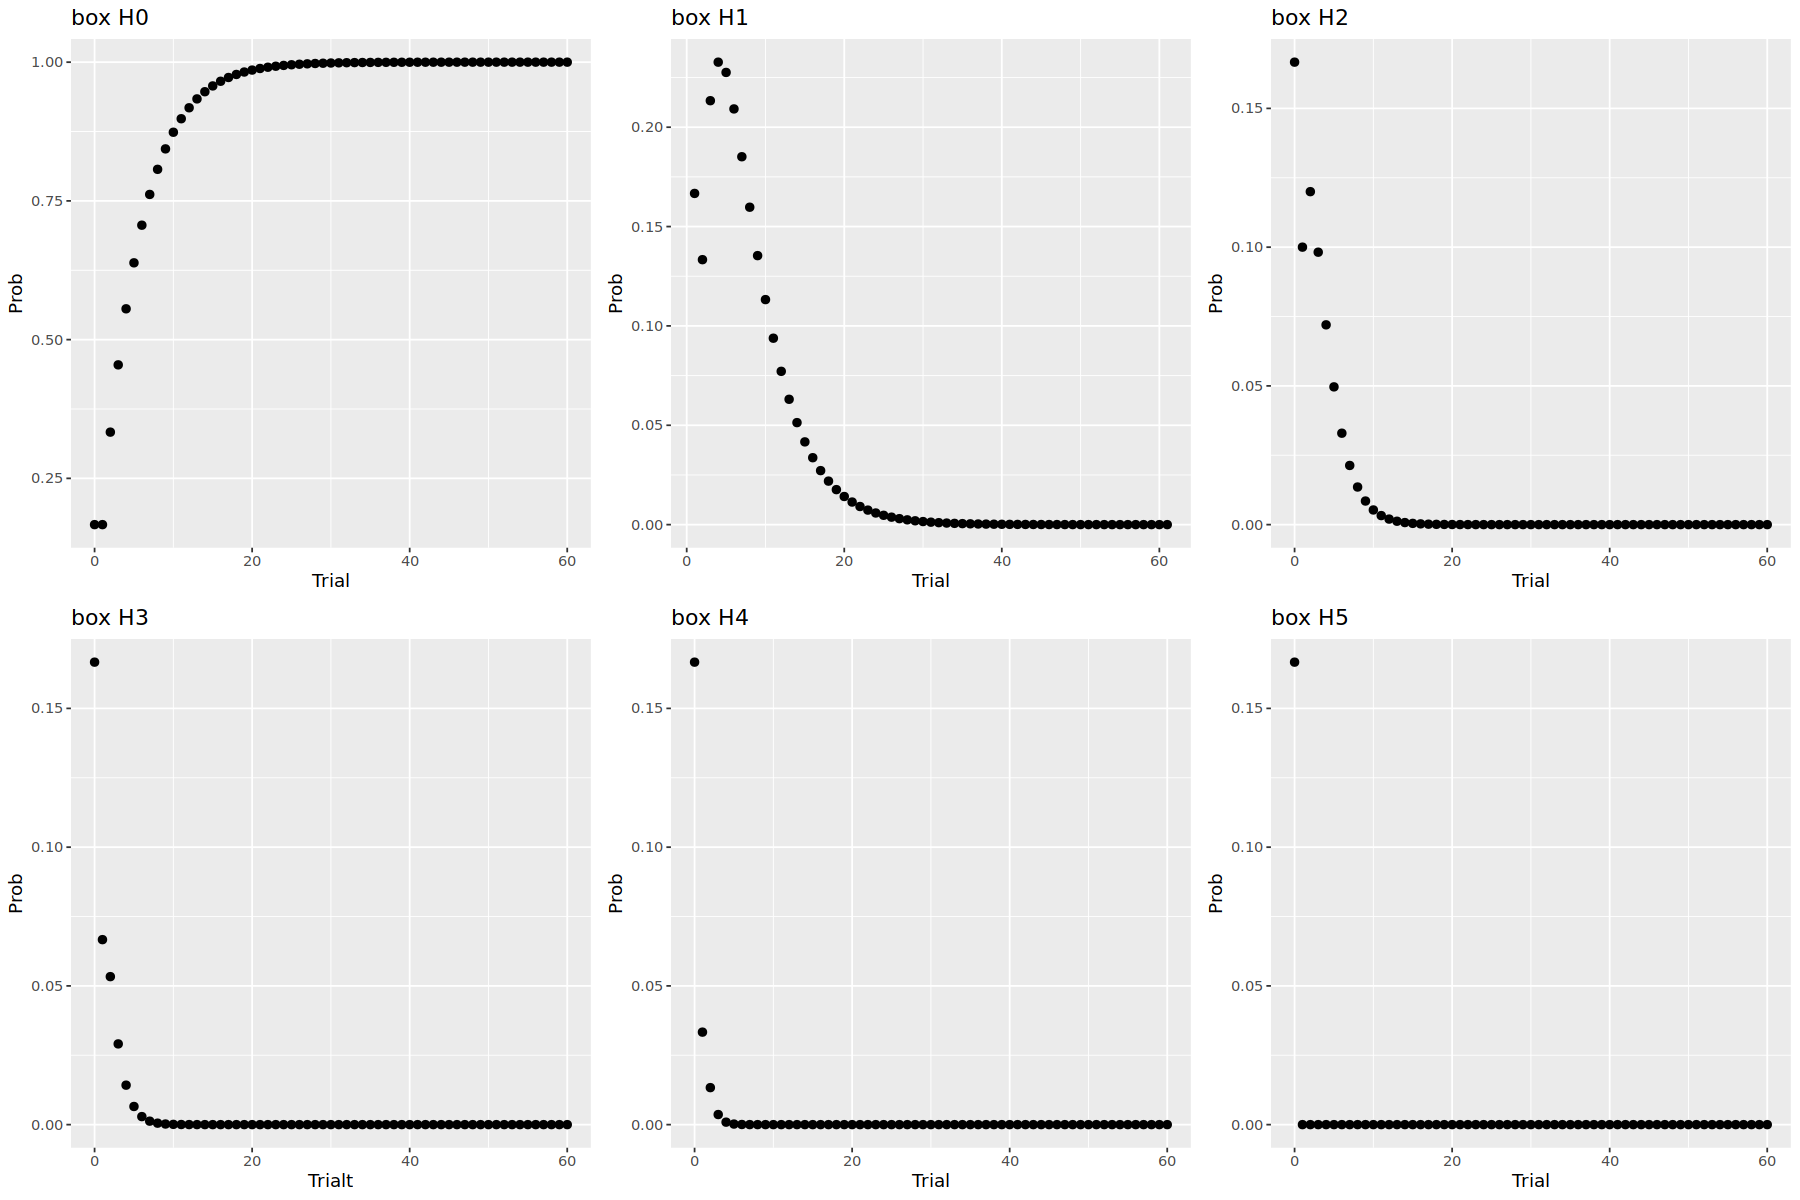

In [26]:
options(repr.plot.width=15, repr.plot.height=10)
H0 <- ggplot(df) +
                geom_point(aes(x=as.numeric(row.names(df))-1, y = pr_H0), size = 2) +
                labs(title = "box H0") +
                scale_x_continuous(name= "Trial")+
                scale_y_continuous(name= "Prob")
H1 <- ggplot(df) +
                geom_point(aes(x=as.numeric(row.names(df)), y = pr_H1), size = 2) +
                labs(title = "box H1") +
                scale_x_continuous(name= "Trial")+
                scale_y_continuous(name= "Prob")
H2 <- ggplot(df) +
                geom_point(aes(x=as.numeric(row.names(df))-1, y = pr_H2), size = 2) +
                labs(title = "box H2") +
                scale_x_continuous(name= "Trial")+
                scale_y_continuous(name= "Prob")
H3 <- ggplot(df) +
                geom_point(aes(x=as.numeric(row.names(df))-1, y = pr_H3), size = 2) +
                labs(title = "box H3") +
                scale_x_continuous(name= "Trialt") +
                scale_y_continuous(name= "Prob")
H4 <- ggplot(df) +
                geom_point(aes(x=as.numeric(row.names(df))-1, y = pr_H4), size = 2) +
                labs(title = "box H4") +
                scale_x_continuous(name= "Trial")+
                scale_y_continuous(name= "Prob")
H5 <- ggplot(df) +
                geom_point(aes(x=as.numeric(row.names(df))-1, y = pr_H5), size = 2) +
                labs(title = "box H5") +
                scale_x_continuous(name= "Trial") +
                scale_y_continuous(name= "Prob")


ggarrange(H0, H1, H2, H3, H4, H5)
